# 과제#2. 직원 이직 예측

* 회사 인사팀에서는 AIVLER 들에게 직원의 이직여부과 관련해서 분석을 요청하였습니다.
* 최근 이직율이 증가하는 것에 대해 우려를 갖고 있기에, 이직여부에 영향을 주는 요인에 대해 분석하여, 이직할 것으로 보이는 직원들에 대해 회사를 떠나지 않도록 인사 프로그램을 준비하려고 합니다.
* 어떤 직원이 이직할지 예측해 봅시다.

![](https://adoptostaging.blob.core.windows.net/media/employee-attrition-reasons-9LIqMv.jpg)

## 0.환경설정

### 1) 라이브러리 로딩

In [1]:
# 기본 라이브러리 가져오기
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split    

### 2) 데이터 로딩

In [2]:
# data data
path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/Attrition_NA.CSV"
data = pd.read_csv(path)
data['Attrition'] = np.where(data['Attrition']=='Yes', 1, 0)
data.tail(10)

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager
1240,0,32,Travel_Rarely,Research & Development,6.0,5,Life Sciences,231,3,Male,...,No,20,1,0,8,2,3,5,4,4
1241,0,29,Travel_Rarely,Sales,19.0,3,Life Sciences,1497,3,Male,...,No,14,3,2,10,3,3,10,7,4
1242,0,31,Non-Travel,Research & Development,1.0,4,Medical,308,3,Male,...,No,12,4,1,6,2,3,5,4,4
1243,0,27,Travel_Rarely,Research & Development,5.0,1,Technical Degree,844,3,Male,...,Yes,16,2,1,9,3,3,9,8,8
1244,0,32,Travel_Rarely,Research & Development,5.0,2,Life Sciences,1555,4,Female,...,No,12,1,1,12,2,3,7,1,5
1245,0,27,Travel_Rarely,Research & Development,19.0,3,Other,1619,4,Male,...,No,11,1,2,7,3,3,7,7,7
1246,0,29,Travel_Rarely,Research & Development,9.0,3,Life Sciences,1558,3,Male,...,No,18,1,2,5,2,2,1,0,0
1247,0,29,Non-Travel,Sales,2.0,3,Life Sciences,469,4,Male,...,No,14,1,1,4,3,2,4,3,2
1248,0,43,Travel_Rarely,Sales,16.0,3,Marketing,327,4,Female,...,Yes,22,3,1,22,3,3,17,13,9
1249,0,26,Travel_Rarely,Research & Development,NaN,4,Medical,1177,1,Male,...,No,22,2,1,8,2,3,8,7,7


|	변수 명	|	내용	|	구분	|
|	----	|	----	|	----	|
|	**Attrition**	|	이직여부, Yes = 1 , No = 0	|	**Target**	|
|	Age	|	나이	|	숫자	|
|	BusinessTravel	|	출장 빈도(범주)	|		|
|	Department	|	현 부서	|		|
|	DistanceFromHome	|	집-직장 거리(마일)	|	숫자	|
|	Education	|	교육수준(범주)	|	1 Below College, 2 College, 3 Bachelor, 4 Master, 5 Doctor	|
|	EducationField	|	전공	|		|
|	EmployeeNumber	|	사번	|		|
|	EnvironmentSatisfaction	|	근무환경에 대한 만족도(범주)	|	1 Low, 2 Good, 3 Excellent, 4 Outstanding	|
|	Gender	|	성별	|		|
|	JobInvolvement	|	직무 적극성(참여도)	|	1 Low, 2 Medium, 3 High, 4 Very High	|
|	JobRole	|	직무	|		|
|	JobSatisfaction	|	직무 만족도	|	1 Low, 2 Medium, 3 High, 4 Very High	|
|	MaritalStatus	|	결혼상태	|		|
|	MonthlyIncome	|	월급	|	숫자	|
|	NumCompaniesWorked	|	현재까지 근무한 회사 수	|	숫자	|
|	OverTime	|	야근여부	|	범주	|
|	PercentSalaryHike	|	전년대비 급여인상율(%)	|	숫자	|
|	RelationshipSatisfaction	|	동료와의 관계 만족도	|	1 Low, 2 Medium, 3 High, 4 Very High	|
|	StockOptionLevel	|	스톡옵션 수준 0~3	|	범주	|
|	TotalWorkingYears	|	총 근무 연수	|	숫자	|
|	TrainingTimesLastYear	|	전년 교육훈련 횟수	|	숫자	|
|	WorkLifeBalance	|	워라밸. 일-삶 균형도	|	1 Bad, 2 Good, 3 Better, 4 Best	|
|	YearsAtCompany	|	현직장 근무 연수	|	숫자	|
|	YearsInCurrentRole	|	현직무 연수	|	숫자	|
|	YearsWithCurrManager	|	현 팀장과 근무한 연수	|	숫자	|


----

## 1.데이터 탐색

## 2.데이터 전처리 

In [3]:
target = 'Attrition'

### 2.1 데이터 정리

* feature와 , target으로 분할

In [4]:
x = data.drop(target, axis = 1)
y = data.loc[:, target]

* 불필요한 feature 제거
    * 제거해야 할 feature를 선정하고 제거하시오. 제거 이유를 주석으로 기술합니다.

In [5]:
for col in x.columns:
    print('='*30)
    print(col, ':')
    print(x[col].value_counts())

Age :
35    71
34    65
36    57
30    57
29    55
31    55
38    51
33    49
32    47
40    47
37    46
28    41
27    40
42    39
39    37
26    36
45    36
41    33
46    30
43    28
44    27
50    25
55    20
25    20
49    20
24    20
47    19
48    17
53    16
54    16
22    15
52    15
23    13
56    13
51    13
21    10
58    10
59     9
18     8
19     8
20     8
57     4
60     4
Name: Age, dtype: int64
BusinessTravel :
Travel_Rarely        892
Travel_Frequently    230
Non-Travel           128
Name: BusinessTravel, dtype: int64
Department :
Research & Development    819
Sales                     379
Human Resources            52
Name: Department, dtype: int64
DistanceFromHome :
2.0     178
1.0     163
10.0     72
7.0      69
8.0      68
3.0      67
9.0      66
4.0      56
5.0      49
6.0      45
16.0     29
24.0     25
23.0     25
11.0     23
28.0     22
18.0     21
26.0     21
14.0     20
29.0     20
25.0     20
20.0     19
15.0     19
12.0     16
17.0     15
22.0     15
19.

In [6]:
# 사번과 직원 이탈 여부는 관련이 없어 보입니다.
# ex. 사번이 안 좋다고 직원이 이탈할 것 같지 않습니다.
x.drop('EmployeeNumber', axis=1, inplace=True)
x.columns

Index(['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsWithCurrManager'],
      dtype='object')

### 2.2 NaN에 대한 조치
* 데이터에 포함된 NaN에 대해서 조치 방법을 결정하고 적용합니다.
* 조치방법을 결정한 이유를 주석으로 기술합니다.

In [7]:
x.isna().sum()

Age                          0
BusinessTravel               0
Department                   0
DistanceFromHome            54
Education                    0
EducationField               0
EnvironmentSatisfaction      0
Gender                       0
JobInvolvement               0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
NumCompaniesWorked          21
OverTime                     0
PercentSalaryHike            0
RelationshipSatisfaction     0
StockOptionLevel             0
TotalWorkingYears            0
TrainingTimesLastYear        0
WorkLifeBalance              0
YearsAtCompany               0
YearsInCurrentRole           0
YearsWithCurrManager         0
dtype: int64

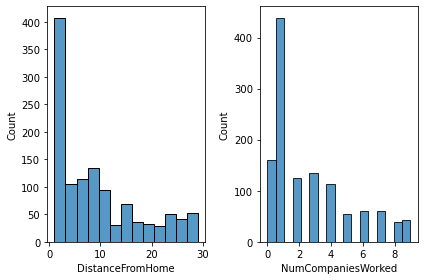

In [8]:
plt.subplot(1,2,1)
sns.histplot(x['DistanceFromHome'])

plt.subplot(1,2,2)
sns.histplot(x['NumCompaniesWorked'])
plt.tight_layout()
plt.show()

In [9]:
# 데이터중 가장 많은 값을 따르는 것이 좋아보여 최빈값으로 NaN을 대체하였다.
x['DistanceFromHome'] = x['DistanceFromHome'].fillna(x['DistanceFromHome'].mode()[0])
x['NumCompaniesWorked'] = x['NumCompaniesWorked'].fillna(x['NumCompaniesWorked'].mode()[0])

x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1250 non-null   int64  
 1   BusinessTravel            1250 non-null   object 
 2   Department                1250 non-null   object 
 3   DistanceFromHome          1250 non-null   float64
 4   Education                 1250 non-null   int64  
 5   EducationField            1250 non-null   object 
 6   EnvironmentSatisfaction   1250 non-null   int64  
 7   Gender                    1250 non-null   object 
 8   JobInvolvement            1250 non-null   int64  
 9   JobRole                   1250 non-null   object 
 10  JobSatisfaction           1250 non-null   int64  
 11  MaritalStatus             1250 non-null   object 
 12  MonthlyIncome             1250 non-null   int64  
 13  NumCompaniesWorked        1250 non-null   float64
 14  OverTime

### 2.3 가변수화
* 범주형 데이터이면서 값이 0,1 로 되어 있는 것이 아니라면, 가변수화를 수행해야 합니다.
* 대상이 되는 변수에 대해서 가변수화를 수행해주세요.

In [10]:
dummy_cols = ['BusinessTravel', 'Department', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement',
       'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'OverTime', 'RelationshipSatisfaction', 'StockOptionLevel',
       'WorkLifeBalance'
]

x = pd.get_dummies(x, columns=dummy_cols, drop_first=True)
x.head()

,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,...,OverTime_Yes,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,33,7.0,11691,0.0,11,14,3,13,9,7,...,0,0,0,1,0,0,0,0,0,1
1,35,18.0,9362,2.0,11,10,2,2,2,2,...,0,0,1,0,0,0,0,0,1,0
2,42,6.0,13348,9.0,13,18,3,13,7,7,...,0,1,0,0,1,0,0,0,0,1
3,46,2.0,17048,8.0,23,28,2,26,15,9,...,0,0,0,0,0,0,0,0,1,0
4,39,2.0,4127,2.0,18,7,6,2,1,2,...,0,0,0,1,1,0,0,0,1,0


### 2.4 (옵션) 추가변수 도출
* 기존 데이터셋의 변수를 이용하여 추가로 도출할 수 있는 변수가 있다면 수행합니다.
* 추가변수에 대해서 주석으로 설명하시오.

### 2.5 데이터 분할

* test 200건(test_size = 200), random_state = 2022
* val 200건(test_size = 200), random_state = 2022
* train 나머지.

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=200, random_state=2022)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1050, 53), (1050,), (200, 53), (200,))

In [12]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=200, random_state=2022)
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((850, 53), (850,), (200, 53), (200,))

### 2.6 (옵션)스케일링 
* 스케일링을 필요로 하는 알고리즘이 있습니다. 
* 필요하다고 판단될때 수행합니다.

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)

## 3.모델링1 : 머신러닝

### 3.1 모델링을 위한 함수 불러오기

* 꼭 필요한 함수만 불러옵니다. 무조건 다 불러오는 것은 지양해주세요.

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [15]:
y_train.value_counts(), y_val.value_counts(), y_test.value_counts()

(0    705
 1    145
 Name: Attrition, dtype: int64,
 0    176
 1     24
 Name: Attrition, dtype: int64,
 0    169
 1     31
 Name: Attrition, dtype: int64)

### 3.2 모델링
* 최소 3개 이상의 알고리즘을 선정합니다.(알고리즘에는 최소 1개 이상의 앙상블 기법을 포함)
    * 아래 주어진 목록 이외의 알고리즘을 선정해도 좋습니다.
* 각 알고리즘별 튜닝을 수행하여 최적의 모델을 생성합니다.
    * 튜닝 방식은 GridSearchCV, RandomizedSearchCV 혹은 for loop 로 직접
    * 단, 선형회귀, 로지스틱 회귀의는 입력 변수(feature)를 조절하여 튜닝을 합니다.
    * 튜닝 과정에 대해서 주석으로 기술합니다.
* 모델링, 튜닝만 수행하는데 그치지 말고, 모델의 내용을 파악하기 위한 분석을 시도합니다. 코드 결과에 대한 분석 의견을 주석으로 기술합니다.
    * 예 : 모델 시각화 및 내용 파악, 튜닝 결과 분석 및 시각화

#### (1) Logistic Regression 모델링

In [16]:
model_LR = LogisticRegression(max_iter=2000)

In [17]:
model_LR.fit(x_train, y_train)

LogisticRegression(max_iter=2000)

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       176
           1       0.88      0.29      0.44        24

    accuracy                           0.91       200
   macro avg       0.89      0.64      0.69       200
weighted avg       0.91      0.91      0.89       200



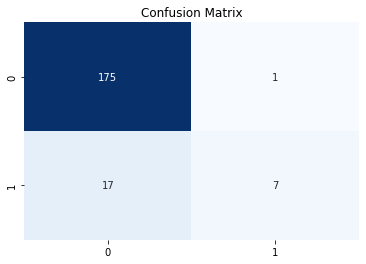

In [18]:
y_pred = model_LR.predict(x_val)
print(classification_report(y_val, y_pred))
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, cbar=False, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.show()

#### (2) Decision Tree 모델링

In [19]:
model = DecisionTreeClassifier()

param = {
    'max_depth':range(1, 101)
}

model_dt = GridSearchCV(model,
                       param,
                       cv=5,
                       scoring='accuracy')

In [20]:
model_dt.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 101)}, scoring='accuracy')

In [21]:
model_dt.best_params_, model_dt.best_score_, model_dt.best_estimator_

({'max_depth': 4}, 0.8376470588235294, DecisionTreeClassifier(max_depth=4))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       176
           1       0.42      0.21      0.28        24

    accuracy                           0.87       200
   macro avg       0.66      0.58      0.60       200
weighted avg       0.84      0.87      0.85       200



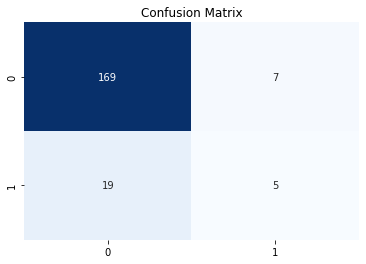

In [22]:
y_pred = model_dt.predict(x_val)
print(classification_report(y_val, y_pred))
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, cbar=False, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.show()

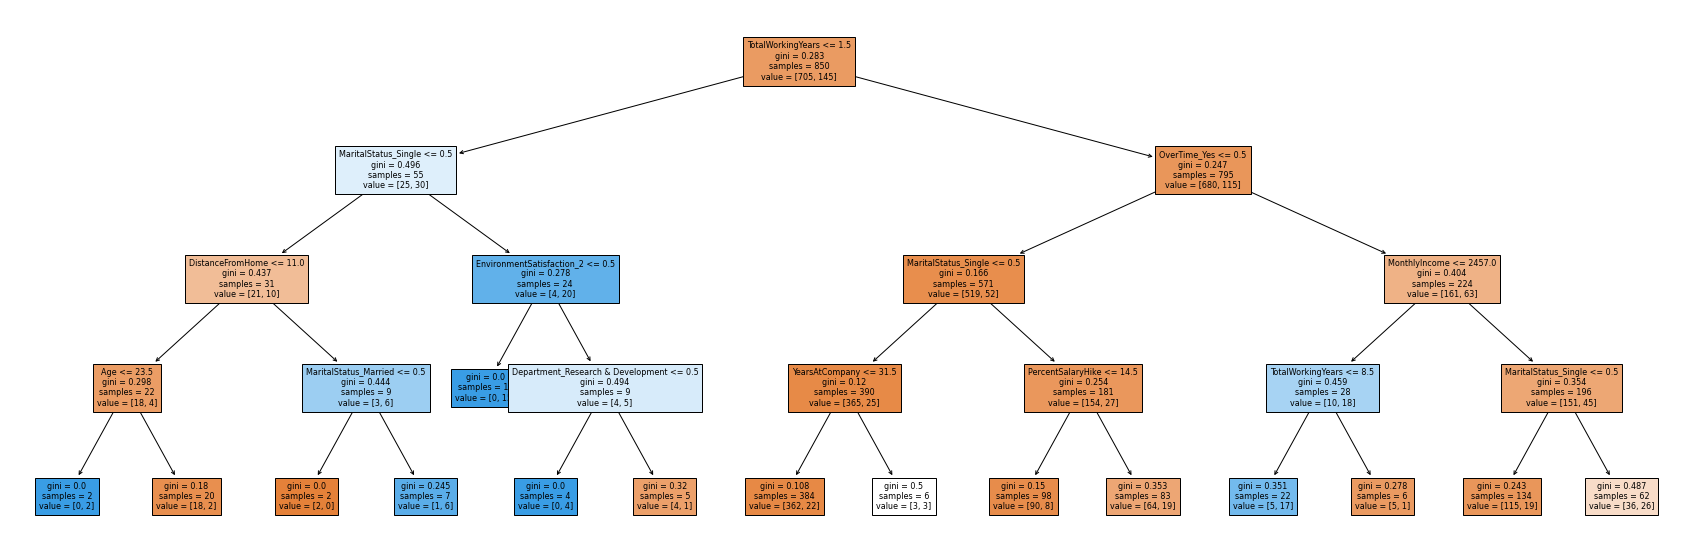

In [23]:
from sklearn.tree import plot_tree

plt.figure(figsize=(30, 10))
plot_tree(model_dt.best_estimator_,
         filled=True,
         feature_names=list(x),
         fontsize=8)
plt.show()

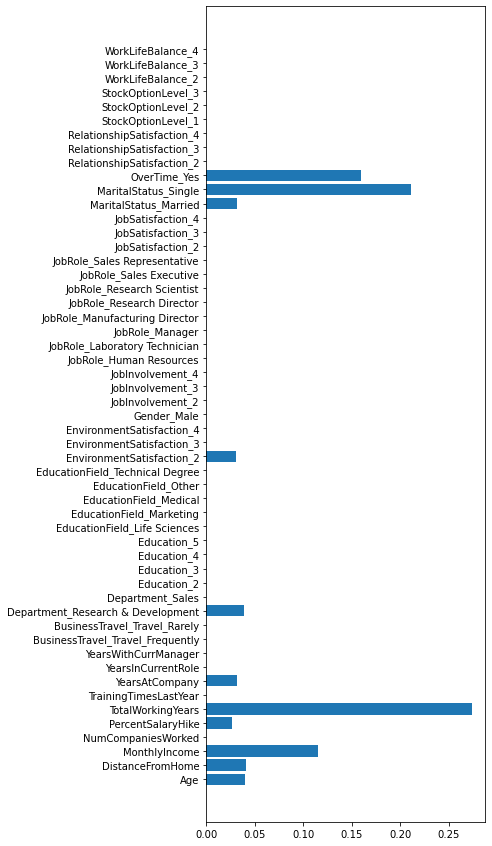

In [24]:
# 직원 이탈여부에 가장 영향을 많이 끼치는 feature는 결혼여부, 야근여부, 환경만족도, 총 근무 연수, 수입등이 있다.
plt.figure(figsize=(5,15))
plt.barh(y=list(x), width=model_dt.best_estimator_.feature_importances_)
plt.show()

#### (3) KNN 모델링

#### (4) SVM 모델링

In [25]:
model = SVC()

param={
    'C':[0.001, 0.01, 0.1, 1, 10],
    'gamma':[0.0001, 0.001, 0.01, 'scale']
}

model_svm_rbf = GridSearchCV(model,
                       param,
                       cv=5,
                       scoring='accuracy')

In [26]:
model_svm_rbf.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.0001, 0.001, 0.01, 'scale']},
             scoring='accuracy')

In [27]:
model_svm_rbf.best_params_, model_svm_rbf.best_score_, model_svm_rbf.best_estimator_

({'C': 10, 'gamma': 0.01}, 0.8576470588235294, SVC(C=10, gamma=0.01))

              precision    recall  f1-score   support

           0       0.90      0.99      0.95       176
           1       0.83      0.21      0.33        24

    accuracy                           0.90       200
   macro avg       0.87      0.60      0.64       200
weighted avg       0.89      0.90      0.87       200



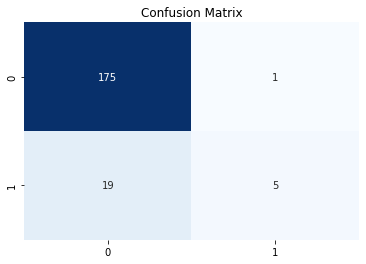

In [28]:
y_pred = model_svm_rbf.predict(x_val_scaled)
print(classification_report(y_val, y_pred))
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, cbar=False, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.show()

In [29]:
model = SVC(kernel='linear')

param={
    'C':[0.001, 0.01, 0.1, 1, 10],
    'gamma':[0.0001, 0.001, 0.01, 'scale']
}

model_svm_linear = GridSearchCV(model,
                       param,
                       cv=5,
                       scoring='accuracy')

In [30]:
model_svm_linear.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.0001, 0.001, 0.01, 'scale']},
             scoring='accuracy')

In [31]:
model_svm_linear.best_params_, model_svm_linear.best_score_, model_svm_linear.best_estimator_

({'C': 1, 'gamma': 0.0001},
 0.8576470588235294,
 SVC(C=1, gamma=0.0001, kernel='linear'))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       176
           1       0.80      0.33      0.47        24

    accuracy                           0.91       200
   macro avg       0.86      0.66      0.71       200
weighted avg       0.90      0.91      0.89       200



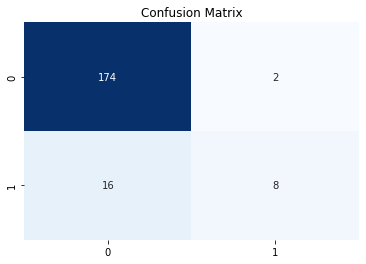

In [32]:
y_pred = model_svm_linear.predict(x_val_scaled)
print(classification_report(y_val, y_pred))
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, cbar=False, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.show()

#### (5) Random Forest 모델링

#### (6) XGB 모델링

In [33]:
model = XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)

param = {
    'max_depth':range(1, 51),
    'learning_rate':[1, 0.1, 0.01],
    'n_estimators':[100, 200, 300, 500]
}

model_xgb = RandomizedSearchCV(model,
                              param,
                              cv=5,
                              n_iter=30)

In [34]:
model_xgb.fit(x_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False,
                                           eval_metric='mlogloss', gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=n...
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                        

In [35]:
model_xgb.best_params_, model_xgb.best_score_, model_xgb.best_estimator_

({'n_estimators': 500, 'max_depth': 18, 'learning_rate': 1},
 0.8564705882352941,
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
               eval_metric='mlogloss', gamma=0, gpu_id=-1, importance_type=None,
               interaction_constraints='', learning_rate=1, max_delta_step=0,
               max_depth=18, min_child_weight=1, missing=nan,
               monotone_constraints='()', n_estimators=500, n_jobs=8,
               num_parallel_tree=1, predictor='auto', random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
               tree_method='exact', use_label_encoder=False,
               validate_parameters=1, verbosity=None))

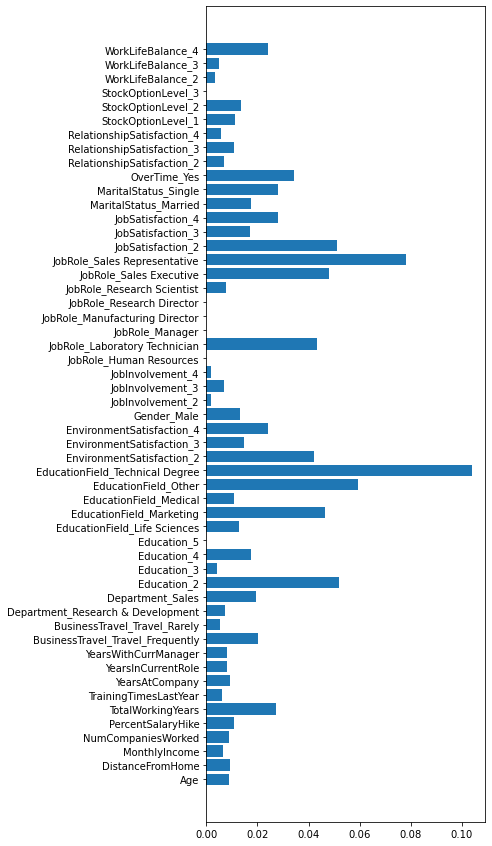

In [36]:
# Decision Tree에 비해 더 많은 feature들이 이직여부에 관여할 수 있다는 것을 알 수 있다.
# 많은 feature중 전공과 직무가 가장 많은 영향을 끼친 것 같다.
plt.figure(figsize=(5,15))
plt.barh(y=list(x), width=model_xgb.best_estimator_.feature_importances_)
plt.show()

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       176
           1       0.44      0.29      0.35        24

    accuracy                           0.87       200
   macro avg       0.67      0.62      0.64       200
weighted avg       0.85      0.87      0.86       200



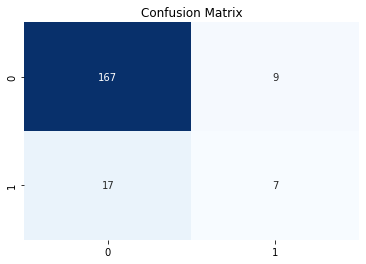

In [37]:
y_pred = model_xgb.predict(x_val)
print(classification_report(y_val, y_pred))
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, cbar=False, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.show()

## 4.모델링2 : 딥러닝

### 4.1 모델링을 위한 함수 불러오기

In [38]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.backend import clear_session
from tensorflow.keras.callbacks import EarlyStopping

### 4.2 모델 설계
* 다양한 구조의 모델 3개 이상을 설계하시오. (히든레이어, 노드 수 조절)

In [39]:
epochs = 1000
batch_size = 16

es = EarlyStopping(monitor='val_loss',
                  min_delta=0,
                  patience=30,
                  verbose=1,
                  restore_best_weights=True)

* 모델1 

In [40]:
clear_session()

il = Input(shape=(53,))
ol = Dense(1, activation='sigmoid')(il)

model_dl_1 = Model(il, ol)

model_dl_1.compile(loss=binary_crossentropy,
             optimizer=Adam(),
             metrics=['accuracy'])

model_dl_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 53)]              0         
                                                                 
 dense (Dense)               (None, 1)                 54        
                                                                 
Total params: 54
Trainable params: 54
Non-trainable params: 0
_________________________________________________________________


In [41]:
model_dl_1.fit(x_train_scaled, y_train,
              epochs=epochs, batch_size=batch_size,
              validation_split=0.2, verbose=1,
              callbacks=[es])

Epoch 1/1000
43/43 [==============================] - 1s 6ms/step - loss: 0.8396 - accuracy: 0.3632 - val_loss: 0.6865 - val_accuracy: 0.5941
Epoch 2/1000
43/43 [==============================] - 0s 2ms/step - loss: 0.6512 - accuracy: 0.6147 - val_loss: 0.5598 - val_accuracy: 0.7588
Epoch 3/1000
43/43 [==============================] - 0s 2ms/step - loss: 0.5463 - accuracy: 0.7574 - val_loss: 0.4947 - val_accuracy: 0.7706
Epoch 4/1000
43/43 [==============================] - 0s 2ms/step - loss: 0.4907 - accuracy: 0.8191 - val_loss: 0.4608 - val_accuracy: 0.8059
Epoch 5/1000
43/43 [==============================] - 0s 2ms/step - loss: 0.4624 - accuracy: 0.8309 - val_loss: 0.4430 - val_accuracy: 0.8235
Epoch 6/1000
43/43 [==============================] - 0s 2ms/step - loss: 0.4470 - accuracy: 0.8324 - val_loss: 0.4341 - val_accuracy: 0.8235
Epoch 7/1000
43/43 [==============================] - 0s 2ms/step - loss: 0.4386 - accuracy: 0.8309 - val_loss: 0.4274 - val_accuracy: 0.8235
Epoch 

* 모델2

In [42]:
clear_session()

il = Input(shape=(53,))
h = Dense(256, activation='relu')(il)
h = Dense(64, activation='relu')(h)
h = Dense(32, activation='relu')(h)
ol = Dense(1, activation='sigmoid')(h)

model_dl_2 = Model(il, ol)

model_dl_2.compile(loss=binary_crossentropy,
             optimizer=Adam(),
             metrics=['accuracy'])

model_dl_2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 53)]              0         
                                                                 
 dense (Dense)               (None, 256)               13824     
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 32,385
Trainable params: 32,385
Non-trainable params: 0
_________________________________________________________________


In [43]:
model_dl_2.fit(x_train_scaled, y_train,
              epochs=epochs, batch_size=batch_size,
              validation_split=0.2, verbose=1,
              callbacks=[es])

Epoch 1/1000
43/43 [==============================] - 1s 7ms/step - loss: 0.4591 - accuracy: 0.8235 - val_loss: 0.4185 - val_accuracy: 0.8235
Epoch 2/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.3949 - accuracy: 0.8309 - val_loss: 0.3977 - val_accuracy: 0.8412
Epoch 3/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.3592 - accuracy: 0.8471 - val_loss: 0.3410 - val_accuracy: 0.8647
Epoch 4/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.3324 - accuracy: 0.8691 - val_loss: 0.3324 - val_accuracy: 0.8765
Epoch 5/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.2873 - accuracy: 0.8912 - val_loss: 0.3234 - val_accuracy: 0.8824
Epoch 6/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.2404 - accuracy: 0.9162 - val_loss: 0.3491 - val_accuracy: 0.8353
Epoch 7/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.2022 - accuracy: 0.9235 - val_loss: 0.3510 - val_accuracy: 0.8353
Epoch 

* 모델3

In [44]:
clear_session()

il = Input(shape=(53,))
h = Dense(32, activation='relu')(il)
ol = Dense(1, activation='sigmoid')(h)

model_dl_3 = Model(il, ol)

model_dl_3.compile(loss=binary_crossentropy,
             optimizer=Adam(),
             metrics=['accuracy'])

model_dl_3.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 53)]              0         
                                                                 
 dense (Dense)               (None, 32)                1728      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,761
Trainable params: 1,761
Non-trainable params: 0
_________________________________________________________________


In [45]:
model_dl_3.fit(x_train_scaled, y_train,
              epochs=epochs, batch_size=batch_size,
              validation_split=0.2, verbose=1,
              callbacks=[es])

Epoch 1/1000
43/43 [==============================] - 1s 10ms/step - loss: 0.4621 - accuracy: 0.8250 - val_loss: 0.4501 - val_accuracy: 0.8235
Epoch 2/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.4217 - accuracy: 0.8309 - val_loss: 0.4267 - val_accuracy: 0.8235
Epoch 3/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.4032 - accuracy: 0.8309 - val_loss: 0.4070 - val_accuracy: 0.8235
Epoch 4/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.3880 - accuracy: 0.8353 - val_loss: 0.3858 - val_accuracy: 0.8294
Epoch 5/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.3762 - accuracy: 0.8382 - val_loss: 0.3727 - val_accuracy: 0.8412
Epoch 6/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.3653 - accuracy: 0.8397 - val_loss: 0.3553 - val_accuracy: 0.8647
Epoch 7/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.3570 - accuracy: 0.8441 - val_loss: 0.3448 - val_accuracy: 0.8647
Epoch

### 4.3 학습 및 최적화
* 다양한 학습조건으로 모델링 수행후 성능을 비교해 봅시다.


              precision    recall  f1-score   support

           0       0.91      0.98      0.95       176
           1       0.70      0.29      0.41        24

    accuracy                           0.90       200
   macro avg       0.81      0.64      0.68       200
weighted avg       0.89      0.90      0.88       200



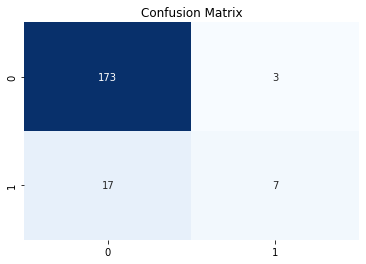

In [46]:
y_pred = model_dl_1.predict(x_val_scaled)
y_pred = y_pred.round().reshape(-1)
print(classification_report(y_val, y_pred))
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, cbar=False, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.show()

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       176
           1       0.44      0.46      0.45        24

    accuracy                           0.86       200
   macro avg       0.68      0.69      0.69       200
weighted avg       0.87      0.86      0.87       200



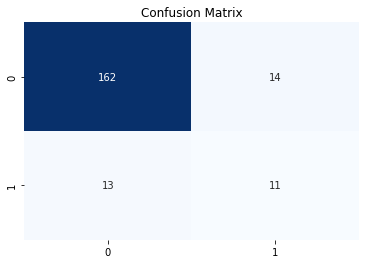

In [47]:
y_pred = model_dl_2.predict(x_val_scaled)
y_pred = y_pred.round().reshape(-1)
print(classification_report(y_val, y_pred))
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, cbar=False, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.show()

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       176
           1       0.59      0.42      0.49        24

    accuracy                           0.90       200
   macro avg       0.76      0.69      0.71       200
weighted avg       0.88      0.90      0.89       200



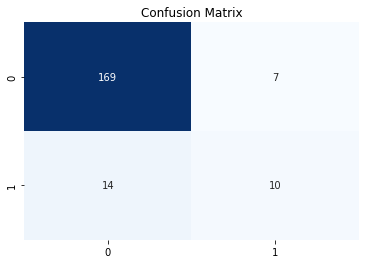

In [48]:
y_pred = model_dl_3.predict(x_val_scaled)
y_pred = y_pred.round().reshape(-1)
print(classification_report(y_val, y_pred))
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, cbar=False, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.show()

## 5.성능 비교
* 알고리즘별 선정된 모델이 최소 6개 입니다. 이에 대해 성능을 평가합니다.
* 평가를 위한 적절한 지표(metric)을 결정하고 비교합니다.
    * 평가지표 선정 이유도 주석으로 기술하시오.
* 최종 모델을 선정하게 된 근거를 주석으로 기술하시오.

### 5.1 평가지표 결정

* 어떤 지표로 성능을 비교할지 결정합니다.
* 결정 이유를 기술합니다.

In [49]:
# classification_report의 accuracy와 1의 recall값을 성능지표로써 비교할 것입니다.

In [50]:
# 정확도가 높은 모델일수록 예측을 잘할 수 있으므로 정확도를 선택했습니다.
# 0의 데이터 수에 비해 1의 데이터 수가 현저히 적으므로 실제값 1을 1로 예측한 비율인 recall값이 높은 모델을 선택할 것입니다.

### 5.2 성능 비교

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       176
           1       0.88      0.29      0.44        24

    accuracy                           0.91       200
   macro avg       0.89      0.64      0.69       200
weighted avg       0.91      0.91      0.89       200



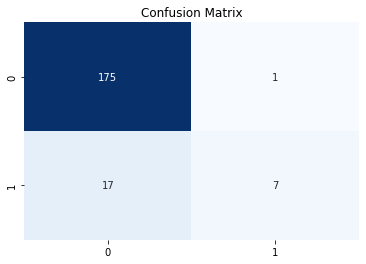

In [51]:
from sklearn.metrics import recall_score, accuracy_score

result_rs={}
result_acc={}

y_pred = model_LR.predict(x_val)
result_rs['Logistic Regression'] = recall_score(y_val, y_pred)
result_acc['Logistic Regression'] = accuracy_score(y_val, y_pred)
print(classification_report(y_val, y_pred))
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, cbar=False, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.show()

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       176
           1       0.42      0.21      0.28        24

    accuracy                           0.87       200
   macro avg       0.66      0.58      0.60       200
weighted avg       0.84      0.87      0.85       200



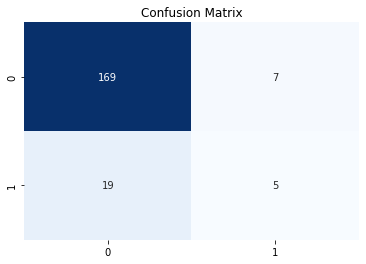

In [52]:
y_pred = model_dt.predict(x_val)
result_rs['Decision Tree'] = recall_score(y_val, y_pred)
result_acc['Decision Tree'] = accuracy_score(y_val, y_pred)
print(classification_report(y_val, y_pred))
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, cbar=False, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.show()

              precision    recall  f1-score   support

           0       0.90      0.99      0.95       176
           1       0.83      0.21      0.33        24

    accuracy                           0.90       200
   macro avg       0.87      0.60      0.64       200
weighted avg       0.89      0.90      0.87       200



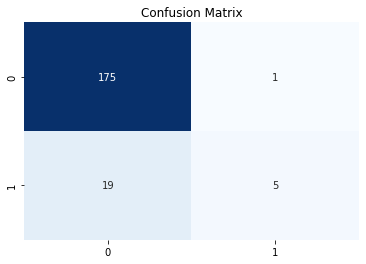

In [53]:
y_pred = model_svm_rbf.predict(x_val_scaled)
result_rs['SVM rbf'] = recall_score(y_val, y_pred)
result_acc['SVM rbf'] = accuracy_score(y_val, y_pred)
print(classification_report(y_val, y_pred))
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, cbar=False, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.show()

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       176
           1       0.80      0.33      0.47        24

    accuracy                           0.91       200
   macro avg       0.86      0.66      0.71       200
weighted avg       0.90      0.91      0.89       200



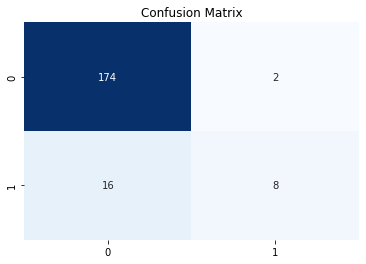

In [54]:
y_pred = model_svm_linear.predict(x_val_scaled)
result_rs['SVM linear'] = recall_score(y_val, y_pred)
result_acc['SVM linear'] = accuracy_score(y_val, y_pred)
print(classification_report(y_val, y_pred))
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, cbar=False, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.show()

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       176
           1       0.44      0.29      0.35        24

    accuracy                           0.87       200
   macro avg       0.67      0.62      0.64       200
weighted avg       0.85      0.87      0.86       200



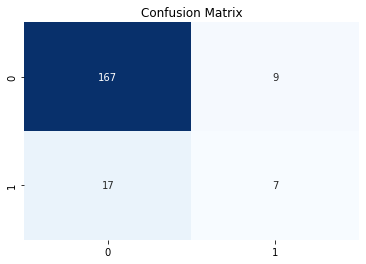

In [55]:
y_pred = model_xgb.predict(x_val)
result_rs['xgb'] = recall_score(y_val, y_pred)
result_acc['xgb'] = accuracy_score(y_val, y_pred)
print(classification_report(y_val, y_pred))
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, cbar=False, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.show()

              precision    recall  f1-score   support

           0       0.91      0.98      0.95       176
           1       0.70      0.29      0.41        24

    accuracy                           0.90       200
   macro avg       0.81      0.64      0.68       200
weighted avg       0.89      0.90      0.88       200



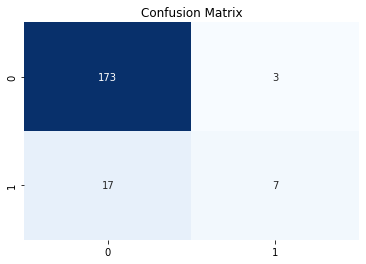

In [56]:
y_pred = model_dl_1.predict(x_val_scaled)
y_pred = y_pred.round().reshape(-1)
result_rs['DL 1'] = recall_score(y_val, y_pred)
result_acc['DL 1'] = accuracy_score(y_val, y_pred)
print(classification_report(y_val, y_pred))
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, cbar=False, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.show()

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       176
           1       0.44      0.46      0.45        24

    accuracy                           0.86       200
   macro avg       0.68      0.69      0.69       200
weighted avg       0.87      0.86      0.87       200



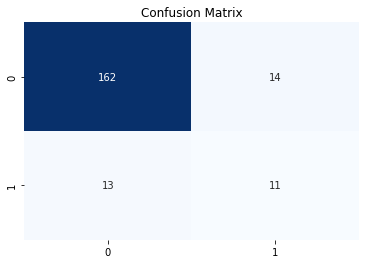

In [57]:
y_pred = model_dl_2.predict(x_val_scaled)
y_pred = y_pred.round().reshape(-1)
result_rs['DL 2'] = recall_score(y_val, y_pred)
result_acc['DL 2'] = accuracy_score(y_val, y_pred)
print(classification_report(y_val, y_pred))
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, cbar=False, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.show()

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       176
           1       0.59      0.42      0.49        24

    accuracy                           0.90       200
   macro avg       0.76      0.69      0.71       200
weighted avg       0.88      0.90      0.89       200



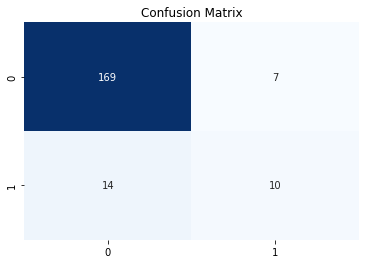

In [58]:
y_pred = model_dl_3.predict(x_val_scaled)
y_pred = y_pred.round().reshape(-1)
result_rs['DL 3'] = recall_score(y_val, y_pred)
result_acc['DL 3'] = accuracy_score(y_val, y_pred)
print(classification_report(y_val, y_pred))
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, cbar=False, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.show()

In [59]:
for (name, acc), (_, rs) in zip(result_acc.items(), result_rs.items()):
    print('='*30)
    print(name)
    print('-'*30)
    print('Accuracy: ', round(acc,2), 'Recall: ', round(rs,2))

Logistic Regression
------------------------------
Accuracy:  0.91 Recall:  0.29
Decision Tree
------------------------------
Accuracy:  0.87 Recall:  0.21
SVM rbf
------------------------------
Accuracy:  0.9 Recall:  0.21
SVM linear
------------------------------
Accuracy:  0.91 Recall:  0.33
xgb
------------------------------
Accuracy:  0.87 Recall:  0.29
DL 1
------------------------------
Accuracy:  0.9 Recall:  0.29
DL 2
------------------------------
Accuracy:  0.86 Recall:  0.46
DL 3
------------------------------
Accuracy:  0.9 Recall:  0.42


### 5.3 모델 선택

In [60]:
# Recall 값과 Accuracy값 모두 높은 DL 3 모델과 Accuracy는 조금 떨어지지만, recall값이 높은 DL 2모델을 사용할 것이다.

### 5.4 최종 모델 성능 평가(Test Data)

In [61]:
x_test_scaled = scaler.transform(x_test)
x_test.shape, y_test.shape, y_test.value_counts()

((200, 53),
 (200,),
 0    169
 1     31
 Name: Attrition, dtype: int64)

In [62]:
result_rs_test = {}
result_acc_test = {}

y_pred = model_LR.predict(x_test)
result_rs_test['Logistic Regression'] = recall_score(y_test, y_pred)
result_acc_test['Logistic Regression'] = accuracy_score(y_test, y_pred)

y_pred = model_dt.predict(x_test)
result_rs_test['Decision Tree'] = recall_score(y_test, y_pred)
result_acc_test['Decision Tree'] = accuracy_score(y_test, y_pred)

y_pred = model_svm_rbf.predict(x_test_scaled)
result_rs_test['SVM rbf'] = recall_score(y_test, y_pred)
result_acc_test['SVM rbf'] = accuracy_score(y_test, y_pred)

y_pred = model_svm_linear.predict(x_test_scaled)
result_rs_test['SVM linear'] = recall_score(y_test, y_pred)
result_acc_test['SVM linear'] = accuracy_score(y_test, y_pred)

y_pred = model_xgb.predict(x_test)
result_rs_test['xgb'] = recall_score(y_test, y_pred)
result_acc_test['xgb'] = accuracy_score(y_test, y_pred)

y_pred = model_dl_1.predict(x_test_scaled)
y_pred = y_pred.round().reshape(-1)
result_rs_test['DL 1'] = recall_score(y_test, y_pred)
result_acc_test['DL 1'] = accuracy_score(y_test, y_pred)

y_pred = model_dl_2.predict(x_test_scaled)
y_pred = y_pred.round().reshape(-1)
result_rs_test['DL 2'] = recall_score(y_test, y_pred)
result_acc_test['DL 2'] = accuracy_score(y_test, y_pred)

y_pred = model_dl_3.predict(x_test_scaled)
y_pred = y_pred.round().reshape(-1)
result_rs_test['DL 3'] = recall_score(y_test, y_pred)
result_acc_test['DL 3'] = accuracy_score(y_test, y_pred)

In [63]:
for (name, acc), (_, rs) in zip(result_acc_test.items(), result_rs_test.items()):
    print('='*30)
    print(name)
    print('-'*30)
    print('Accuracy: ', round(acc,2), 'Recall: ', round(rs,2))

Logistic Regression
------------------------------
Accuracy:  0.9 Recall:  0.52
Decision Tree
------------------------------
Accuracy:  0.88 Recall:  0.32
SVM rbf
------------------------------
Accuracy:  0.9 Recall:  0.32
SVM linear
------------------------------
Accuracy:  0.91 Recall:  0.48
xgb
------------------------------
Accuracy:  0.87 Recall:  0.52
DL 1
------------------------------
Accuracy:  0.9 Recall:  0.48
DL 2
------------------------------
Accuracy:  0.86 Recall:  0.48
DL 3
------------------------------
Accuracy:  0.92 Recall:  0.55


## 6. 결론

In [64]:
# 예상과 같이 test set에 대하여 DL 3이 가장 좋은 성능을 보이고 있었다.
# 하지만, 두번째로 성능이 뛰어났던 것은 DL 2가 아닌 Logistic Regression모델이었다.
# target데이터의 불균형 때문에 대체적으로 recall값이 낮은 것 같다.
# Input 컬럼을 달리해서 넣거나 추가적인 feature를 생성해야 할 것 같다.